In [170]:
import numpy as np
import pandas as pandas
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from tensorflow.keras import regularizers
%matplotlib inline

In [154]:
# Import Reuters data with set number of words
num_words = 10000
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=num_words)

In [155]:
# PROBLEM 1
def vectorize_sequences(sequences, dimension=num_words):
    '''Helper funciton for vectorizing x values for this dataset, based on the number of words. Shared from assignment 3.'''
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Vectorize train and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Use tensorflow to_categorical method to convert label data
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# Get validation x and y values from training data
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [156]:
# Define model as described in assignment 3 and compile
model = models.Sequential([
    Dense(64, activation='relu', input_shape=(num_words,)),
    Dense(64, activation='relu'),
    Dense(46, activation='softmax'),
])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [157]:
# Fit model, persisting history for use in ploting
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 74ms/step - loss: 2.5596 - accuracy: 0.5304 - val_loss: 1.6404 - val_accuracy: 0.6500
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.3462 - accuracy: 0.7170 - val_loss: 1.2587 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0041 - accuracy: 0.7844 - val_loss: 1.1268 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.7949 - accuracy: 0.8281 - val_loss: 1.0134 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6223 - accuracy: 0.8667 - val_loss: 0.9708 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5000 - accuracy: 0.8976 - val_loss: 0.9119 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.3972 - accuracy: 0.9179 - val_loss: 0.9147 - val_accuracy: 0.8130
Epoch 8/20
16

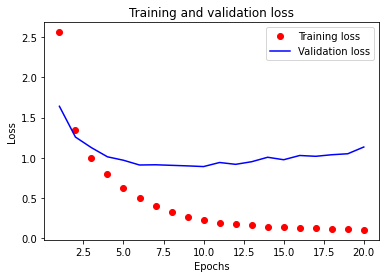

In [158]:
# Get training loss and validation loss, plot against the number of epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# It appears that the optimal number of epochs is 8.

In [159]:
# Use the same model params
model = models.Sequential([
    Dense(64, activation='relu', input_shape=(num_words,)),
    Dense(64, activation='relu'),
    Dense(46, activation='softmax'),
])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# But fit using 8 epochs (the optimal number)
model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
loss, accuracy = model.evaluate(x_test, one_hot_test_labels)
print('Results at optimal number of epochs:')
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/8
16/16 [==============================] - 0s 21ms/step - loss: 2.6008 - accuracy: 0.5234 - val_loss: 1.7702 - val_accuracy: 0.6300
Epoch 2/8
16/16 [==============================] - 0s 14ms/step - loss: 1.4737 - accuracy: 0.6911 - val_loss: 1.3571 - val_accuracy: 0.6990
Epoch 3/8
16/16 [==============================] - 0s 14ms/step - loss: 1.1040 - accuracy: 0.7665 - val_loss: 1.1696 - val_accuracy: 0.7530
Epoch 4/8
16/16 [==============================] - 0s 14ms/step - loss: 0.8800 - accuracy: 0.8166 - val_loss: 1.0629 - val_accuracy: 0.7670
Epoch 5/8
16/16 [==============================] - 0s 14ms/step - loss: 0.7082 - accuracy: 0.8518 - val_loss: 0.9833 - val_accuracy: 0.7890
Epoch 6/8
16/16 [==============================] - 0s 14ms/step - loss: 0.5768 - accuracy: 0.8805 - val_loss: 0.9390 - val_accuracy: 0.7960
Epoch 7/8
16/16 [==============================] - 0s 14ms/step - loss: 0.4636 - accuracy: 0.9040 - val_loss: 0.9371 - val_accuracy: 0.8010
Epoch 8/8
71/71 [===

In [160]:
# PROBLEM 2 - Comparison with AWS
# Summary is that the training epochs in AWS took ~10ms, as opposed to ~15ms locally
# EC2 instance details:
# AMI Name: Deep Learning AMI (Amazon Linux 2) Version 34.0
# Cores: 8
# Type: t2.2xlarge
# Screenshot: https://drive.google.com/file/d/1fQquZP4LH7meg-FuSQgSKL1uDT5d9kQ9/view?usp=sharing


In [161]:
# PROBLEM 3
# I had a hard time understanding exactly what this question was asking. I apologize for any misunderstanding. Normally, I wouldn't do cross validation this way, but it appears we are being asked to only get folds of the validation data. That's how I've implmented it here.
model = models.Sequential([
    Dense(64, activation='relu', input_shape=(10000,)),
    Dense(64, activation='relu'),
    Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# Declare results dict for storing values
results = {'loss': [], 'accuracy': []}

kf = KFold(n_splits=4, shuffle=True)
# Split the validation values into folds, use the larger of the indices as validation in the training
for train_index, test_index in kf.split(x_val, y_val):
    x_val_fold = x_val[train_index]
    y_val_fold = y_val[train_index]
    model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val_fold, y_val_fold))
    loss, accuracy = model.evaluate(x_test, one_hot_test_labels)
    results['loss'].append(loss)
    results['accuracy'].append(accuracy)
    tf.keras.backend.clear_session()


Epoch 1/8
16/16 [==============================] - 0s 22ms/step - loss: 2.6659 - accuracy: 0.5433 - val_loss: 1.7750 - val_accuracy: 0.6320
Epoch 2/8
16/16 [==============================] - 0s 13ms/step - loss: 1.4077 - accuracy: 0.7155 - val_loss: 1.3387 - val_accuracy: 0.7133
Epoch 3/8
16/16 [==============================] - 0s 14ms/step - loss: 1.0370 - accuracy: 0.7826 - val_loss: 1.1770 - val_accuracy: 0.7533
Epoch 4/8
16/16 [==============================] - 0s 14ms/step - loss: 0.8162 - accuracy: 0.8290 - val_loss: 1.0871 - val_accuracy: 0.7760
Epoch 5/8
16/16 [==============================] - 0s 14ms/step - loss: 0.6545 - accuracy: 0.8622 - val_loss: 1.0180 - val_accuracy: 0.7907
Epoch 6/8
16/16 [==============================] - 0s 13ms/step - loss: 0.5239 - accuracy: 0.8906 - val_loss: 0.9649 - val_accuracy: 0.7973
Epoch 7/8
16/16 [==============================] - 0s 14ms/step - loss: 0.4262 - accuracy: 0.9100 - val_loss: 0.9732 - val_accuracy: 0.8013
Epoch 8/8
71/71 [===

Loss: 1.220151960849762, Accuracy: 0.782947450876236


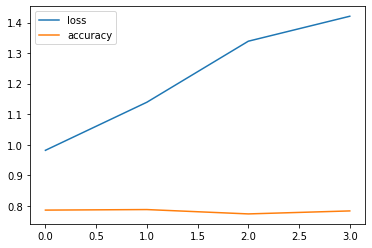

In [162]:
fold_results = pd.DataFrame(results)
fold_results.plot()
avg_loss = np.mean(results['loss'])
avg_accuracy = np.mean(results['accuracy'])
print(f'Loss: {avg_loss}, Accuracy: {avg_accuracy}')
# This loss is higher and the accuracy is lower than in problem 1. This is to be expected because the validation sets are smaller. Again, I would
# never do this, but the question appears to imply this.

In [174]:
# PROBLEM 3 - part 2
# Instead, I would shuffle the X_train data and extract validation data. Perhaps this is what was intended.
model = models.Sequential([
    Dense(64, activation='relu', input_shape=(10000,)),
    Dense(64, activation='relu'),
    Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# Declare results dict for storing values
results = {'loss': [], 'accuracy': []}
kf = KFold(n_splits=4, shuffle=True)
# Split the validation values into folds, use the larger of the indices as validation in the training
for train_index, test_index in kf.split(x_train, y_train):
    x_train_fold, x_val_fold, y_train_fold, y_val_fold = train_test_split(x_train[train_index], y_train[train_index])
    model.fit(x_train_fold, y_train_fold, epochs=8, batch_size=512, validation_data=(x_val_fold, y_val_fold))
    loss, accuracy = model.evaluate(x_test, one_hot_test_labels)
    results['loss'].append(loss)
    results['accuracy'].append(accuracy)
    tf.keras.backend.clear_session()

Epoch 1/8
10/10 [==============================] - 0s 29ms/step - loss: 2.9207 - accuracy: 0.4507 - val_loss: 2.0927 - val_accuracy: 0.5618
Epoch 2/8
10/10 [==============================] - 0s 17ms/step - loss: 1.6908 - accuracy: 0.6615 - val_loss: 1.5598 - val_accuracy: 0.6728
Epoch 3/8
10/10 [==============================] - 0s 16ms/step - loss: 1.2449 - accuracy: 0.7498 - val_loss: 1.3479 - val_accuracy: 0.7162
Epoch 4/8
10/10 [==============================] - 0s 17ms/step - loss: 0.9904 - accuracy: 0.8013 - val_loss: 1.2170 - val_accuracy: 0.7458
Epoch 5/8
10/10 [==============================] - 0s 16ms/step - loss: 0.7995 - accuracy: 0.8401 - val_loss: 1.1248 - val_accuracy: 0.7684
Epoch 6/8
10/10 [==============================] - 0s 16ms/step - loss: 0.6530 - accuracy: 0.8682 - val_loss: 1.0659 - val_accuracy: 0.7714
Epoch 7/8
10/10 [==============================] - 0s 16ms/step - loss: 0.5364 - accuracy: 0.8935 - val_loss: 1.0254 - val_accuracy: 0.7833
Epoch 8/8
71/71 [===

Loss: 1.1465715169906616, Accuracy: 0.7828361392021179


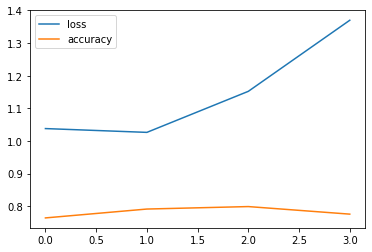

In [172]:
fold_results = pd.DataFrame(results)
fold_results.plot()
avg_loss = np.mean(results['loss'])
avg_accuracy = np.mean(results['accuracy'])
print(f'Loss: {avg_loss}, Accuracy: {avg_accuracy}')
# Similar results, but much higher loss.

In [ ]:
# PROBLEM 4
# Create axes for multiple subplots on the same figure
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 16))
axes = axes.flatten()
# Define all lambda values
all_vals = [0.001, 0.005, 0.0005]
lambda_results = {'loss': [], 'val_loss': [], 'rate': []}
# Loop through lambda values, training new models with each one as input to the kernel regularizer
for i, lambda_val in enumerate(all_vals):
    model = models.Sequential([
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(lambda_val), input_shape=(num_words,)),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(lambda_val)),
        Dense(46, activation='softmax'),
    ])
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
    # Get loss, val_loss and plot on the respective axis to show its relationship to optimal epochs
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    axes[i].plot(epochs, loss, 'ro', label='Training loss')
    axes[i].plot(epochs, val_loss, 'b', label='Validation loss')
    axes[i].set_title(f'Lambda: {lambda_val}')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Loss')
    axes[i].legend()
    lambda_results['loss'].append(loss)
    lambda_results['val_loss'].append(val_loss)
    lambda_results['rate'].append(lambda_val)
    fig.tight_layout()
    # Clear the session to ensure model is retrained
    tf.keras.backend.clear_session()


In [ ]:
# Lambda has a large impact on the optimal number of epochs. For 0.001 and 0.0005, the optimal number of epochs is 5-6 and the overall loss is lower than 0.005. This means there's a better return, even with less training time.
# Table
lambda_results_df = pd.DataFrame(lambda_results)
lambda_results_df

In [ ]:
# PROBLEM 5
# Create axes for multiple subplots on the same figure
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 16))
axes = axes.flatten()
# Define all rates values
all_rates = [0.5, 0.4, 0.3]
rate_results = {'loss': [], 'val_loss': [], 'rate': []}
for i, dropout_rate in enumerate(all_rates):
    # Add dropout layers to the model
    model = models.Sequential([
        Dense(64, activation='relu', input_shape=(num_words,)),
        Dropout(rate=dropout_rate),
        Dense(64, activation='relu'),
        Dropout(rate=dropout_rate),
        Dense(46, activation='softmax')
    ])
    # Compile with same params as problem 1
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
    # Get loss and val loss, plot as function of epochs with multiple axes for showing the different dropout rates
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    axes[i].plot(epochs, loss, 'ro', label='Training loss')
    axes[i].plot(epochs, val_loss, 'b', label='Validation loss')
    axes[i].set_title(f'Dropout Rate: {dropout_rate}')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Loss')
    axes[i].legend()
    rate_results['loss'].append(loss)
    rate_results['val_loss'].append(val_loss)
    rate_results['rate'].append(dropout_rate)
    fig.tight_layout()
    tf.keras.backend.clear_session()

In [ ]:
# A higher dropout rate appears to get the validation loss to drop more quickly. But the lower the dropout rate in these examples, the lower the validation loss becomes overall.
# Table
# rate_results_df = pd.DataFrame(rate_results)
rate_results_df